# Second Wave?
There has been much discussion of a second wave of cases this week. The stock market took a big hit due to this. What does the data tell us?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
from datetime import datetime, timedelta
from data_mappings import state_full_names

In [2]:
states = pd.read_csv("https://covidtracking.com/api/states/daily.csv")
states['date'] = pd.to_datetime(states['date'],format='%Y%m%d')
states['state'] = states['state'].map(state_full_names)
states.rename(columns={
    'death': 'deaths',
    'deathIncrease': 'new_deaths',
    'positive': 'cases',
    'positiveIncrease': 'new_cases',
    'hospitalizedIncrease': 'new_hospitalizations',
    'onVentilatorCurrently': 'on_ventilator',
    'inIcuCurrently': 'in_icu'
},inplace=True)
states = states.sort_values(by=['state','date'])

In [3]:
states.head()

,date,state,cases,negative,pending,hospitalizedCurrently,hospitalizedCumulative,in_icu,inIcuCumulative,on_ventilator,...,posNeg,new_deaths,new_hospitalizations,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
5333,2020-03-07,Alabama,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,a4388367e28ef3d701e0bc61ab7bef329e93282a,0,0,0,0,0,NaN
5283,2020-03-08,Alabama,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,2a3404d131dff3ba2df22714cecccb9ac3d5e10b,0,0,0,0,0,NaN
5233,2020-03-09,Alabama,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,17ff321b9da0df7ea7e6ef888114643a097e90d6,0,0,0,0,0,NaN
5183,2020-03-10,Alabama,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,f75f8cae0c54991e86ca38cefed707967a606489,0,0,0,0,0,NaN
5133,2020-03-11,Alabama,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,0,0,fe8196a0383fcd9ef39687ae91f07448b734c61e,0,0,0,0,0,NaN


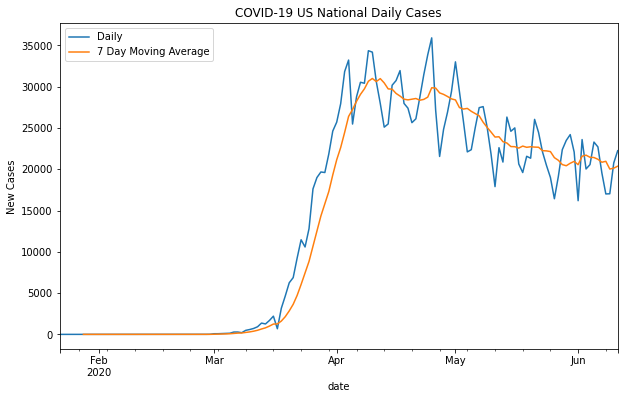

In [21]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
states.groupby('date').new_cases.sum().plot(ax=ax,label='Daily')
states.groupby('date').new_cases.sum().rolling(7).mean().plot(ax=ax,label='7 Day Moving Average')
ax.set_ylabel('New Cases')
ax.set_title('COVID-19 US National Daily Cases')
ax.legend(loc='upper left');

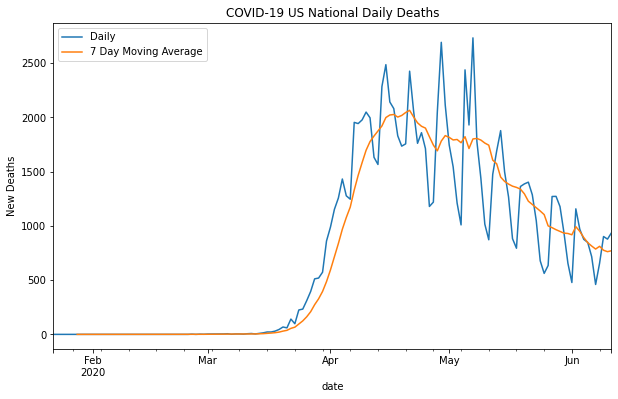

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
states.groupby('date').new_deaths.sum().plot(ax=ax,label='Daily')
states.groupby('date').new_deaths.sum().rolling(7).mean().plot(ax=ax,label='7 Day Moving Average')
ax.set_ylabel('New Deaths')
ax.set_title('COVID-19 US National Daily Deaths')
ax.legend(loc='upper left');

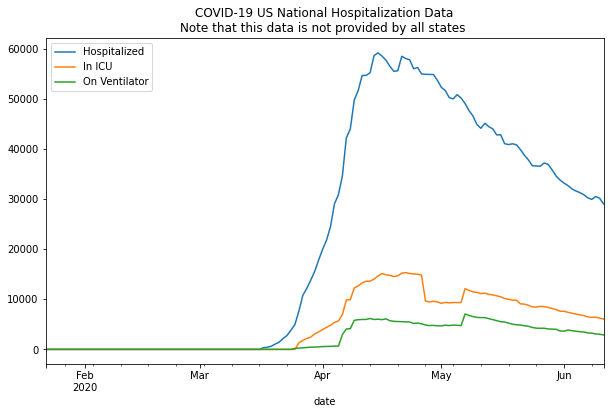

In [71]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
states.groupby('date').hospitalizedCurrently.sum().plot(ax=ax,label='Hospitalized')
states.groupby('date').in_icu.sum().plot(ax=ax,label='In ICU')
states.groupby('date').on_ventilator.sum().plot(ax=ax,label='On Ventilator')
ax.set_title('COVID-19 US National Hospitalization Data\nNote that this data is not provided by all states ')
ax.legend(loc='upper left');

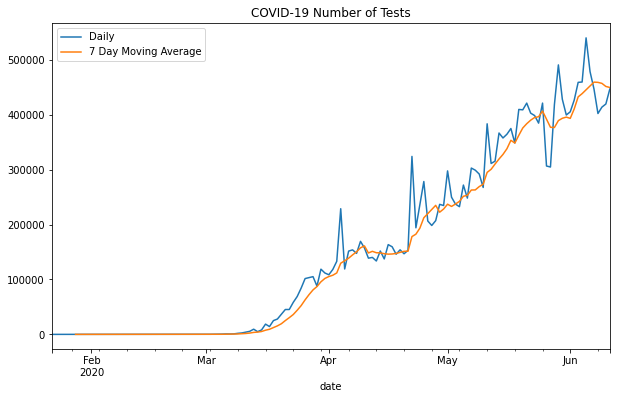

In [83]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
states.groupby('date').totalTestResultsIncrease.sum().plot(ax=ax,label='Daily')
states.groupby('date').totalTestResultsIncrease.sum().rolling(7).mean().plot(ax=ax,label='7 Day Moving Average')
ax.set_title('COVID-19 Number of Tests')
ax.legend(loc='upper left');

In [29]:
for state in states.state:
    states.loc[states.state == state,'new_cases_7d'] = \
        states.loc[states.state == state,'new_cases'].rolling(7).mean()
    states.loc[states.state == state,'new_deaths_7d'] = \
        states.loc[states.state == state,'new_deaths'].rolling(7).mean()

In [72]:
for state in states.state:
    states.loc[states.state == state,'delta_cases_14d'] = (
        states.loc[states.state == state,'new_cases_7d'] -
        states.loc[states.state == state,'new_cases_7d'].shift(14)
    )
    states.loc[states.state == state,'delta_deaths_14d'] = (
        states.loc[states.state == state,'new_deaths_7d'] -
        states.loc[states.state == state,'new_deaths_7d'].shift(14)
    )        

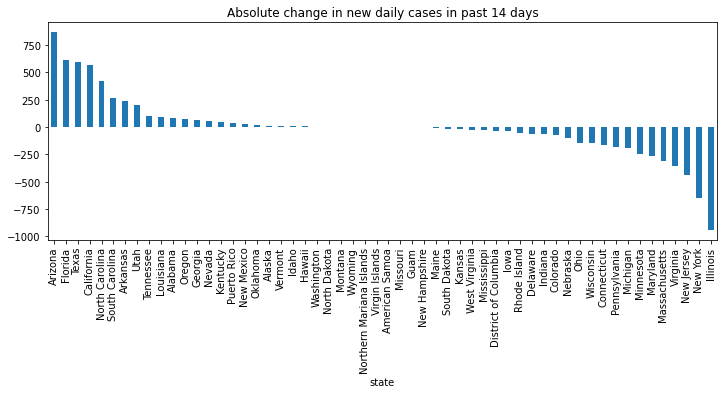

In [78]:
states.groupby('state')\
    .delta_cases_14d.agg('last')\
    .sort_values(ascending=False)\
    .plot.bar(figsize=(12,4))
plt.title('Absolute change in new daily cases in past 14 days');
plt.ylabel('');

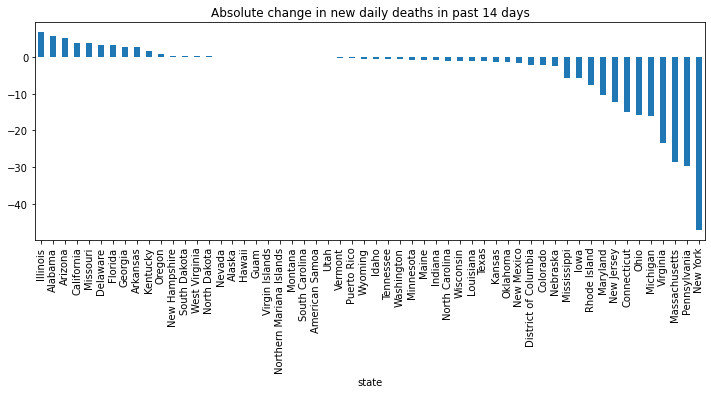

In [77]:
states.groupby('state')\
    .delta_deaths_14d.agg('last')\
    .sort_values(ascending=False)\
    .plot.bar(figsize=(12,4))
plt.title('Absolute change in new daily deaths in past 14 days');
plt.ylabel('');

In [84]:
states.columns

Index(['date', 'state', 'cases', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'in_icu',
       'inIcuCumulative', 'on_ventilator', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'deaths', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'fips', 'new_cases', 'negativeIncrease', 'total',
       'totalTestResults', 'totalTestResultsIncrease', 'posNeg', 'new_deaths',
       'new_hospitalizations', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade', 'new_cases_7d', 'new_deaths_7d', 'delta_cases_14d',
       'delta_deaths_14d'],
      dtype='object')

In [87]:
states.loc[states.state == 'California',
    ['positiveTestsViral','negativeTestsViral','totalTestResultsIncrease','posNeg','negativeScore', 'positiveScore', 'score']]

,positiveTestsViral,negativeTestsViral,totalTestResultsIncrease,posNeg,negativeScore,positiveScore,score
5443,NaN,NaN,0,515,0,0,0
5419,NaN,NaN,0,515,0,0,0
5385,NaN,NaN,7,522,0,0,0
5336,NaN,NaN,9,531,0,0,0
5286,NaN,NaN,19,550,0,0,0
...,...,...,...,...,...,...,...
229,NaN,NaN,53918,2362218,0,0,0
173,NaN,NaN,68972,2431190,0,0,0
117,NaN,NaN,55055,2486245,0,0,0
61,NaN,NaN,54553,2540798,0,0,0


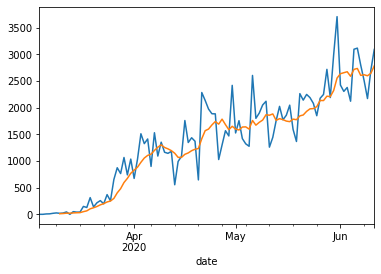

In [91]:
states.loc[states.state == 'California'].groupby('date').new_cases.sum().plot()
states.loc[states.state == 'California'].groupby('date').new_cases.sum().rolling(7).mean().plot()

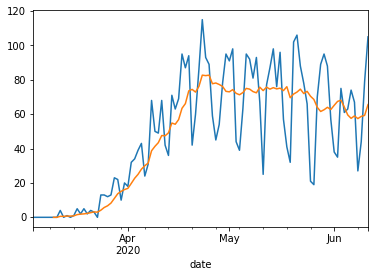

In [92]:
states.loc[states.state == 'California'].groupby('date').new_deaths.sum().plot()
states.loc[states.state == 'California'].groupby('date').new_deaths.sum().rolling(7).mean().plot()